# Project 1 : 911 Emergency Calls Analysis

## Objective :
    - In depth analysis of 911 Emergency Calls Data

## Dataset :
    -The dataset consists of Emergency (911) Calls for Fire, Traffic, EMS for Montgomery County, PA.
    

### Loading Required Libraries

In [1]:
# Data Manipulation Library
import numpy as np
import pandas as pd

# Data Visualisation Library
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading Dataset into pandas Dataframe

In [2]:
callData = pd.read_csv('911.csv')

In [3]:
callData.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Overview of data

    - The dataset consists of 423909 entries(call records) made to 911
    - The data has in total 9 attributes(columns)
    - The columns are as follows:
        1. lat : float64
            - It gives latitude data about the caller.'
        2. lng : float64
            - It gives longitude data about the caller.
        3. desc : object type : It may contain string
            - It gives description of emergency for which the call was made.
        4. zip : float64
            - It has zipcode of caller.
            - Zipcode for few caller is not known so it has 52129 null records.
        5. title : object type data
            - It gives title of the emergency.
        6. timeStamp : object
            - Date and time of the call.
        7. twp : object
            - Town of the caller.
        8. addr : object
            - Adress of the caller.

In [4]:
callData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


### Analysis of Numerical Data


In [5]:
callData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lat,423909.0,40.158618,0.129170,0.000000,40.099784,40.143900,40.229008,51.335390
lng,423909.0,-75.314022,0.656048,-119.698206,-75.391547,-75.304563,-75.210760,87.854975
zip,371780.0,19234.732269,301.388898,3366.000000,19038.000000,19401.000000,19446.000000,77316.000000
e,423909.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### How many different types of calls.

    - 141 different types of calls are made.
    - But it can be seen from below countplot that 50% of call types are not frequent.

#### From further analysis of value_counts it is seen that
    - Minimum number of calls made for a type 1 calls.
        - It shows that there is some title for which only 1 call has been made.
    - Maximum number of calls made for a type 98401 calls.
        - It can be call as the most frequent emergency
        - From graph it can be seen that most common emergency is of Traffic Accident. 
    - Median number of calls made for a type 159.0 calls.
        - It verifies that for 50% of the titles hardly 159 calls are made at max.

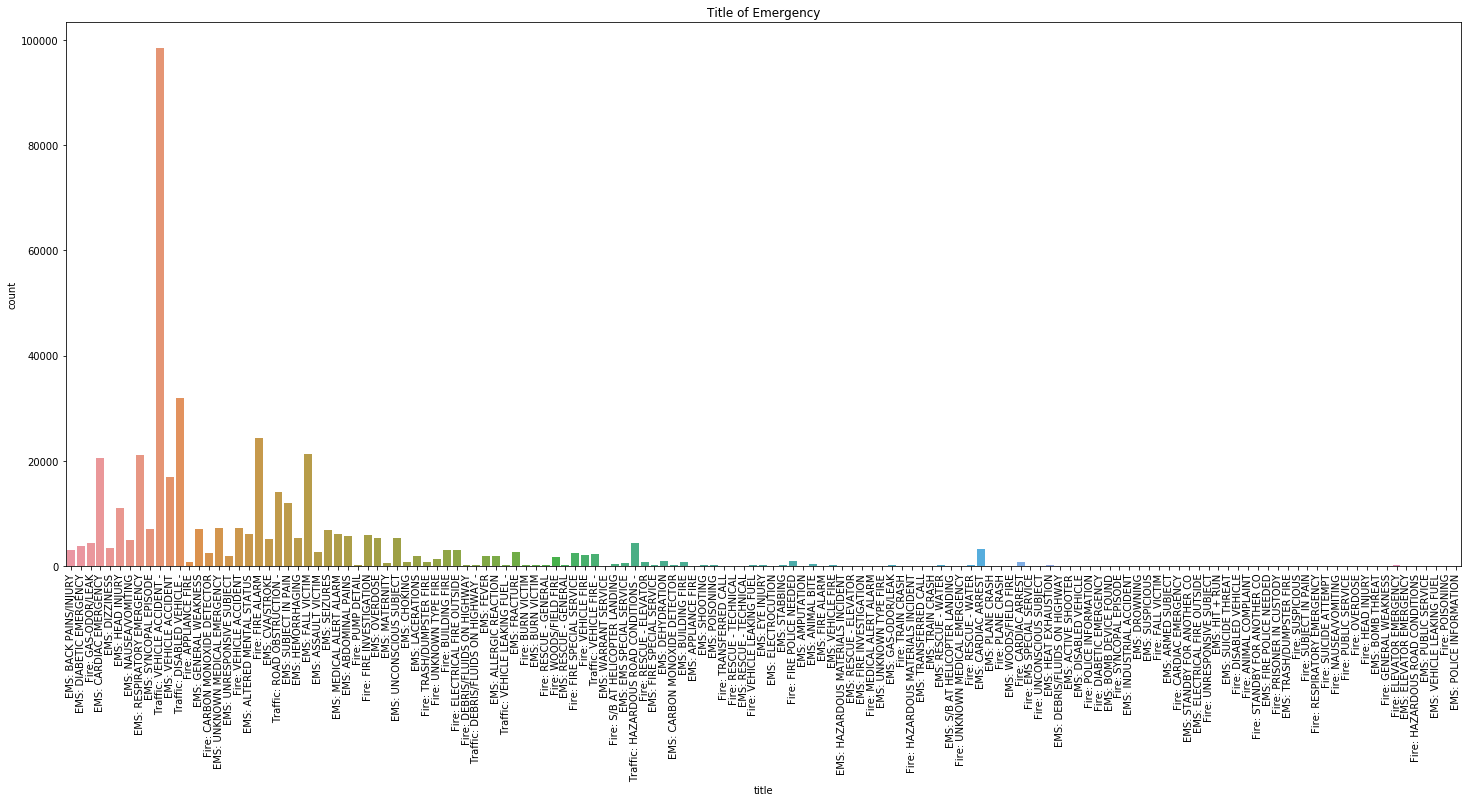

In [6]:
_ , axs = plt.subplots(1,1, figsize = (25,10))
chart = sns.countplot(callData['title'],ax=axs)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
chart.set_title("Title of Emergency");

In [7]:
callTypeCount = callData['title'].value_counts()
print(f'{len(callTypeCount)} different types of calls are made.')

141 different types of calls are made.


In [8]:
print(f'Minimum number of calls made for a type {min(callTypeCount)} calls.')
print(f'Maximum number of calls made for a type {max(callTypeCount)} calls.')
print(f'Median number of calls made for a type {np.median(callTypeCount)} calls.')

Minimum number of calls made for a type 1 calls.
Maximum number of calls made for a type 98401 calls.
Median number of calls made for a type 159.0 calls.


### Extract the date and time regarding the calls

    - The data is split into two columns Date and Time.
    - And the timeStamp column is dropped.

In [9]:
# Splitting date and time using str.split
splitDateTime = callData["timeStamp"].str.split(" ", n = 1, expand = True) 
splitDateTime.head(5)

,0,1
0,2015-12-10,17:10:52
1,2015-12-10,17:29:21
2,2015-12-10,14:39:21
3,2015-12-10,16:47:36
4,2015-12-10,16:56:52


In [10]:
# Creating new columns with date and time in dataframe
callData['Date'] = splitDateTime[0]
callData['Time'] = splitDateTime[1]

In [11]:
# Reviewing updated dataframe
callData.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,Time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10,17:10:52
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10,17:29:21
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015-12-10,14:39:21
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10,16:47:36
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10,16:56:52


In [12]:
callData.drop(columns =["timeStamp"], inplace = True)

### At what time of day/month I can expect which type of call.

In [13]:
dayCall = callData[['title','Time']]
dayCall.head(5)

,title,Time
0,EMS: BACK PAINS/INJURY,17:10:52
1,EMS: DIABETIC EMERGENCY,17:29:21
2,Fire: GAS-ODOR/LEAK,14:39:21
3,EMS: CARDIAC EMERGENCY,16:47:36
4,EMS: DIZZINESS,16:56:52


In [14]:
df_by_time = pd.DataFrame(dayCall.groupby('Time'))
df_by_time.head(5)

,0,1
0,00:00:00,title Time 361...
1,00:00:01,title Time 8512 ...
2,00:00:03,title Time 7...
3,00:00:04,title Time 6...
4,00:00:06,title Time 113862...


In [15]:
finalDf = pd.DataFrame()
for index in range(len(df_by_time)):
    df_by_time[1][index].reset_index(inplace=True)
    df_by_time[1][index].rename(columns={'index':'Count'}, inplace=True)
    finalDf = finalDf.append(df_by_time[1][index])    
finalDf.reset_index(inplace=True)
finalDf.drop('index', axis=1,inplace=True) 
finalDf.head(10)

,Count,title,Time
0,36115,EMS: MEDICAL ALERT ALARM,00:00:00
1,223318,EMS: FALL VICTIM,00:00:00
2,8512,Fire: GAS-ODOR/LEAK,00:00:01
3,136026,Fire: FIRE ALARM,00:00:01
4,252551,EMS: HEAD INJURY,00:00:01
5,318405,Fire: GAS-ODOR/LEAK,00:00:01
6,329472,EMS: ABDOMINAL PAINS,00:00:01
7,377494,EMS: FALL VICTIM,00:00:01
8,77455,Traffic: ROAD OBSTRUCTION -,00:00:03
9,68053,EMS: ALTERED MENTAL STATUS,00:00:04


### Visualize the percentage share of emergency type for each call.

In [16]:
callTypes = callData['title'].value_counts()
callTypes = pd.DataFrame(callTypes)
callTypes.reset_index(inplace=True)
callTypes.rename(columns={'index':'title','title':'count'},inplace=True)

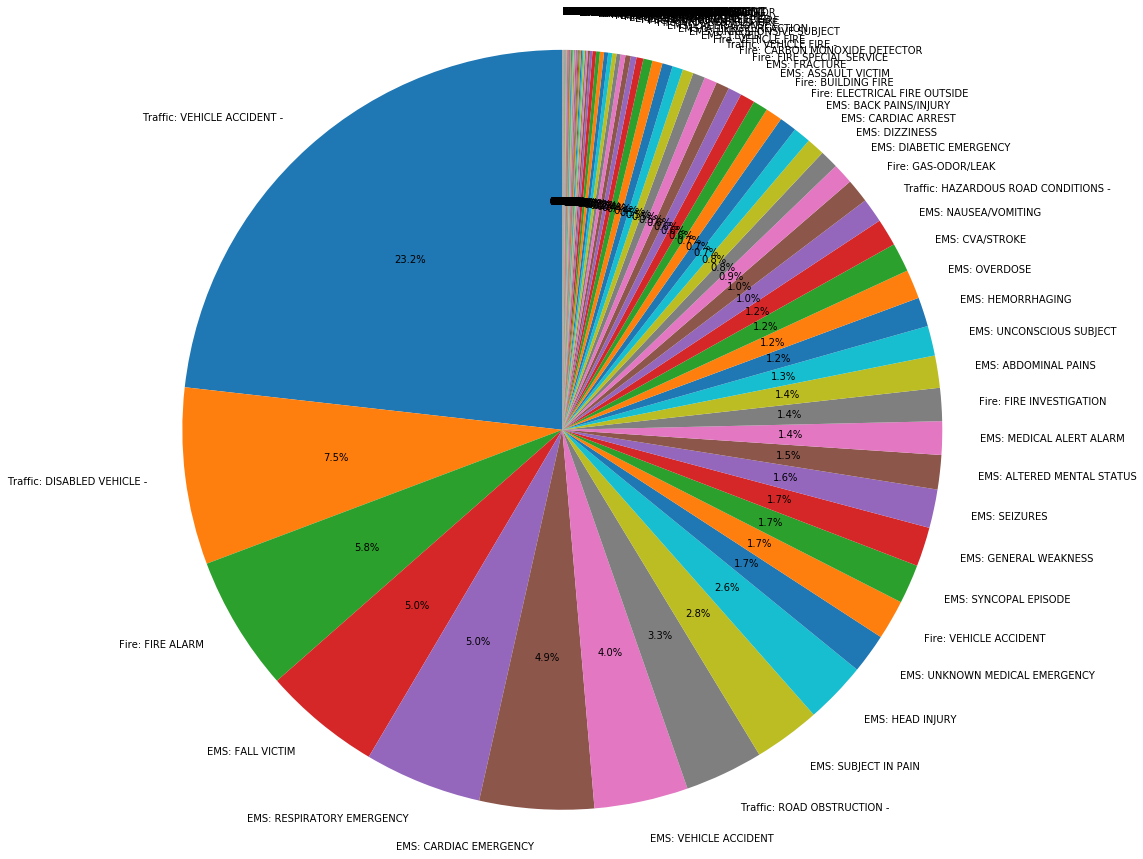

In [17]:
_ , axs = plt.subplots(figsize=(15,15))
axs.pie(callTypes['count'], labels=callTypes['title'], autopct='%1.1f%%',
        shadow=False, startangle=90)
axs.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()